In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%cd C:\Users\praga\Downloads\PRML\Assign2
datasetdf=pd.read_csv('A2Q1.csv',header=None)

dataset=datasetdf.to_numpy()

C:\Users\praga\Downloads\PRML\Assign2


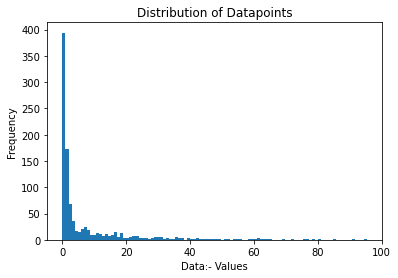

In [20]:
plt.hist(dataset,bins=100)

plt.xlabel('Data:- Values')
plt.ylabel('Frequency')
plt.title('Distribution of Datapoints')

plt.show()

# 1) iv) K − means with K=4

In [23]:
def Kmeans(Xw,K):
    mus=np.random.choice(len(Xw),K,replace=False)
    means=Xw[mus]
    clustinds=np.array([0 for i in range(len(Xw))])
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(Xw))])
    errorfunc=[]
    distmat=get_dist(means,Xw)
    clustinds=np.argmin(distmat,axis=1)
    loss=np.sum(np.min(distmat,axis=1))
    errorfunc.append(loss)
    noconv=1
    while noconv:
        loss=0
        means=get_means(K,clustinds,Xw)#means step
        distmat=get_dist(means,Xw)
        clustinds=np.argmin(distmat,axis=1)
        loss=np.sum(np.min(distmat,axis=1))
        if loss==errorfunc[-1]:
            noconv=0
        errorfunc.append(loss)
    return means, clustinds, errorfunc

In [53]:


def get_means(K,clustind,X):#means step
    means=np.zeros((K,1))
    meanscount=np.zeros(K)
    for i in range(len(X)):
        means[clustind[i]]+=X[i]
        meanscount[clustind[i]]+=1
    for r in range(K):
        means[r]=means[r]/meanscount[r]
    return means
    

def get_dist(means,X):#calc dist
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(X))])
    for i in range(len(X)):
        dist[i]=np.sum((X[i]-means)**2,axis=1)
    return dist
        
    

def isdec(A):#to check monotonic, debug tool
    for i in range(len(A)-1):
        if A[i]<A[i+1]:
            return A[i]
    return True

def plotter(Kres,X):
    means=Kres[0]
    K=len(means)
    clusters=[[] for i in range(K)]
    for t in range(len(X)):
        clusters[Kres[1][t]].append(X[t])
        
    fig,ax=plt.subplots(1,2,figsize=(16,5))
#     ax[0].plot(np.array(clusters[1])[:,0],color='r')
    
    
    ax[0].plot(np.array(clusters[0])[:,0],color='r')
    ax[0].plot(np.array(clusters[1])[:,0],color='g')
    ax[0].plot(np.array(clusters[2])[:,0],color='b')
    ax[0].plot(np.array(clusters[3])[:,0],color='y')
#     ax[0].plot(means[:,0],marker='D',color='black')
    ax[0].title.set_text('Datapoints and Clusters')
    ax[0].set(xlabel='Number of datapoints', ylabel='Range of Values')
    ax[0].legend(['Cluster1','Cluster2','Cluster3','Cluster4',"means"])
    ax[1].plot(Kres[-1])
    ax[1].set(xlabel="Iterations", ylabel="Error")
    ax[1].title.set_text("Error Function")
    
        
        



True

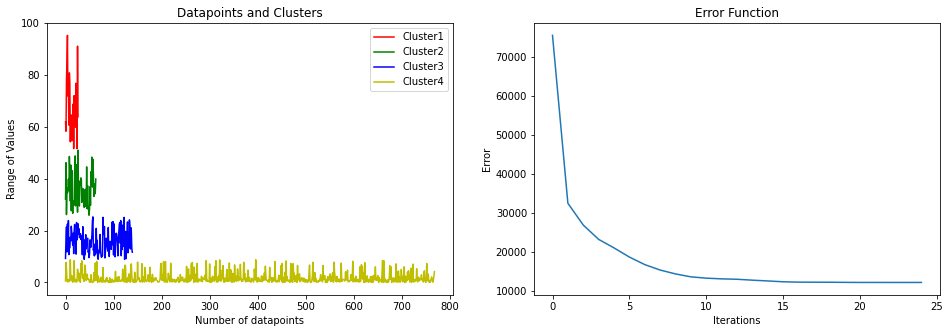

In [54]:
kmean=Kmeans(dataset,4)
plotter(kmean,dataset)
isdec(kmean[-1])

###### a[2]

In [29]:
def em_init(X,K=4):
    means=X[np.random.choice(len(X),K,replace=False)]
    K=4

    var=np.array([[np.random.uniform(300)] for i in range(K)])
    probab=[[np.random.sample()] for i in range(K)]
    probab=probab/np.sum(probab)
    
    return means,var,probab
    

In [30]:
def Expectation(theta):
    
    means,var,probab=theta   
    K=len(means)
    lamdba=[[]for i in range(K)] 
    lamdbaa=[[]for i in range(K)] 
    denom=[[0.]for i in range(len(dataset))]
    
    for k in range(K):

        lamdba[k]=1/np.sqrt(2*np.pi*var[k])*np.exp(-(dataset-means[k])**2/(2*var[k]))*probab[k]
        denom+=lamdba[k]
    
    for j in range(K):
        lamdbaa[j]=lamdba[j]/denom
    
    
        
    return lamdbaa

In [31]:
def Maximization(lamdba):
    K=len(lamdba)
    means=np.array([[np.sum(lamdba[i]*dataset)/np.sum(lamdba[i])] for i in range(K)])
    var=np.array([[np.sum(lamdba[i]*(dataset-means[i])**2)/np.sum(lamdba[i])] for i in range(K)])
    probab=np.array([[np.sum(lamdba[i])/len(dataset)] for i in range(K)])
    return means,var,probab
    
    
    

In [32]:
def convchk(theta1,theta0):
    return np.linalg.norm(theta1[0]-theta0[0])+np.linalg.norm(theta1[1]-theta0[1])+np.linalg.norm(theta1[2]-theta0[2])

In [33]:
def LogL(theta):
    means,var,probab=theta 
    LL=[np.log(np.sum(
        [
            probab[k]*np.exp(-(dataset[i]-means[k])**2/(2*var[k]))*1/np.sqrt(2*np.pi*var[k]) 
         for k in range(4)])) 
     for i in range(len(dataset))]
    
    return np.sum(LL)
    
    

In [35]:
# theta_t=em_init(dataset,4)# initializing EM GMM
# perform=[LogL(theta_t)]
# nonconv=1
# while nonconv:
#     lamdba=Expectation(theta_t)
#     theta_T=Maximization(lamdba)
#     perform.append(LogL(theta_T))
#     if convchk(theta_T,theta_t)<0.01:
#         nonconv=0
#     theta_t=theta_T
    

In [36]:
from tqdm import tqdm
performset=[]
for la in tqdm(range(100)):
    theta_t=em_init(dataset,4)# initializing EM GMM
    perform=[LogL(theta_t)]
    nonconv=1
    i=0
    while nonconv and i<=150:
        lamdba=Expectation(theta_t)
        theta_T=Maximization(lamdba)
        perform.append(LogL(theta_T))
        if convchk(theta_T,theta_t)<0.001:
            nonconv=0
        i+=1
        theta_t=theta_T
    performset.append(perform)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [12:51<00:00,  7.72s/it]


In [38]:
min([len(k) for k in performset])

48

In [39]:
graphic=np.array([0.0 for i in range(40)])
for k in range(len(performset)):
    graphic+=np.array(performset[k][:40])
graphic=graphic/len(performset)

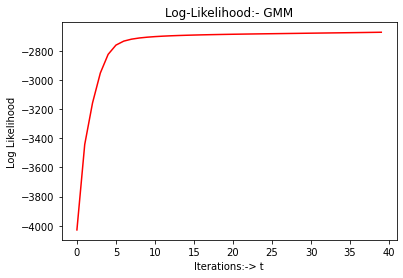

In [43]:
plt.plot(graphic,c='r')
plt.title('Log-Likelihood:- GMM')
plt.xlabel('Iterations:-> t')
plt.ylabel(r'Log Likelihood')
plt.show()

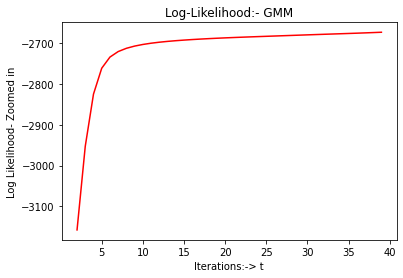

In [55]:
plt.plot(range(2,40),graphic[2:40],c='r')
plt.title('Log-Likelihood:- GMM')
plt.xlabel('Iterations:-> t')
plt.ylabel(r'Log Likelihood- Zoomed in')
plt.show()


In [56]:
graphic[-1]

-2672.598883211129